In [31]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn

def CubicSplines(datos):
    """
    Implementación trazadores cúbicos
    Entradas:
    datos -- lista de puntos (x, y) en el plano ordenados por x

    Salidas:
    a -- vector de coeficientes (constantes)
    b -- vector de coeficientes (lineales)
    c -- vector de coeficientes (cuadráticos)
    d -- vector de coeficientes (cúbicos)
    """
    n = len(datos)-1
    # Inicializar vectores auxiliares
    A = [x[1] for x in datos]
    X = [x[0] for x in datos]
    H = [0.0 for x in range(n)]
    B = [0.0 for x in range(n+1)]
    C = [0.0 for x in range(n+1)]
    D = [0.0 for x in range(n+1)]
    alpha = [0.0 for x in range(n)]
    mu = [0.0 for x in range(n+1)]
    lo = [1.0 for x in range(n+1)]
    z = [0.0 for x in range(n+1)]

    # Crear vector $H$
    for i in range(n):
        H[i] = X[i+1]-X[i]

    # Crear vector $\alpha$
    for i in range(1, n):
        alpha[i] = (3/H[i])*(A[i+1]-A[i])-(3/H[i-1])*(A[i]-A[i-1])

    # Solucionar sistema tridiagonal
    for i in range(1, n):
        lo[i] = 2*(X[i+1]-X[i-1])-H[i-1]*mu[i-1]
        mu[i] = H[i]/lo[i]
        z[i] = (alpha[i]-H[i-1]*z[i-1])/lo[i]

    # Solucionar sistema tridiagonal
    for j in range(n-1, -1, -1):
        C[j] = z[j]-mu[j]*C[j+1]
        B[j] = (A[j+1]-A[j])/(H[j])-H[j]*(C[j+1]+2*C[j])/3
        D[j] = (C[j+1]-C[j])/(3*H[j])

    # Retornar vectores $A$, $B$, $C$, $D$
    return A[:-1], B[:-1], C[:-1], D[:-1]


def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

In [4]:
#Datos de prueba $(0,1)$, $(1,e)$, $(2,e^2)$ y $(3,e^3)$
datos = [(-2,0), (0,-1), (1,1), (2,2), (4,0)]
a, b, c, d = CubicSplines(datos)
print("Vectores de coeficientes:")
print("A =", a)
print("B =", b)
print("C =", c)
print("D =", d)

Vectores de coeficientes:
A = [0, -1, 1, 2]
B = [-1.4318181818181817, 1.3636363636363638, 1.875, 0.13636363636363646]
C = [0.0, 1.3977272727272727, -0.8863636363636365, -0.8522727272727273]
D = [0.23295454545454544, -0.7613636363636364, 0.01136363636363639, 0.14204545454545456]


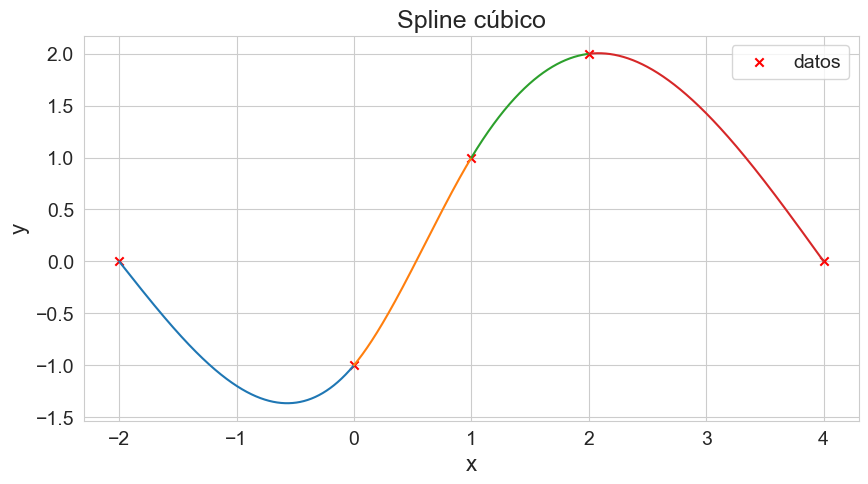

In [11]:
datos_x, datos_y = [-2,0,1,2,4], [0,-1,1,2,0]
s_0 = lambda x: a[0] + b[0]*(x+2) + c[0]*(x+2)**2 + d[0]*(x+2)**3
s_1 = lambda x: a[1] + b[1]*(x) + c[1]*(x)**2 + d[1]*(x)**3
s_2 = lambda x: a[2] + b[2]*(x-1) + c[2]*(x-1)**2 + d[2]*(x-1)**3
s_3 = lambda x: a[3] + b[3]*(x-2) + c[3]*(x-2)**2 + d[3]*(x-2)**3

fig, ax = plt.subplots(figsize=(10, 5))
x_0 =np.linspace(-2, 0, 1000)
x_1 =np.linspace(0, 1, 1000)
x_2 =np.linspace(1, 2, 1000)
x_3 =np.linspace(2, 4, 1000)

plt.plot(x_0, s_0(x_0))
plt.plot(x_1, s_1(x_1))
plt.plot(x_2, s_2(x_2))
plt.plot(x_3, s_3(x_3))
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Spline cúbico', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [14]:
s_0(-1)

-1.1988636363636362

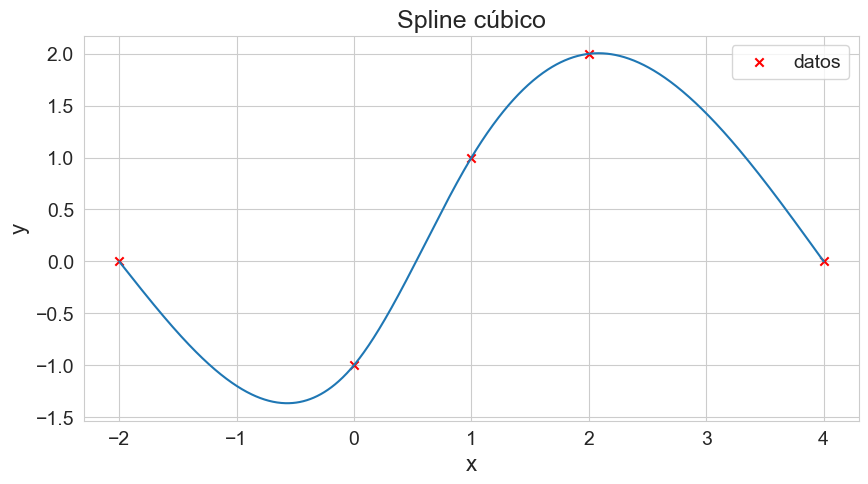

In [16]:
from scipy.interpolate import CubicSpline
p = CubicSpline(datos_x, datos_y, bc_type='natural')

fig, ax = plt.subplots(figsize=(10, 5))
xspace =np.linspace(-2, 4, 1000)
plt.plot(xspace, p(xspace))
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Spline cúbico', fontsize=18)
plt.legend(fontsize=14)
plt.show()

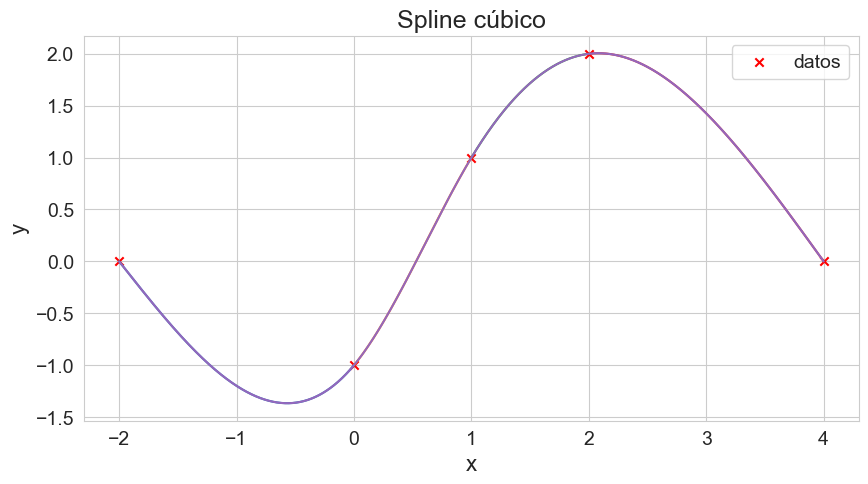

In [17]:
datos_x, datos_y = [-2,0,1,2,4], [0,-1,1,2,0]
s_0 = lambda x: a[0] + b[0]*(x+2) + c[0]*(x+2)**2 + d[0]*(x+2)**3
s_1 = lambda x: a[1] + b[1]*(x) + c[1]*(x)**2 + d[1]*(x)**3
s_2 = lambda x: a[2] + b[2]*(x-1) + c[2]*(x-1)**2 + d[2]*(x-1)**3
s_3 = lambda x: a[3] + b[3]*(x-2) + c[3]*(x-2)**2 + d[3]*(x-2)**3

fig, ax = plt.subplots(figsize=(10, 5))
x_0 =np.linspace(-2, 0, 1000)
x_1 =np.linspace(0, 1, 1000)
x_2 =np.linspace(1, 2, 1000)
x_3 =np.linspace(2, 4, 1000)
xspace =np.linspace(-2, 4, 1000)

plt.plot(x_0, s_0(x_0))
plt.plot(x_1, s_1(x_1))
plt.plot(x_2, s_2(x_2))
plt.plot(x_3, s_3(x_3))
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')
plt.plot(xspace, p(xspace))

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Spline cúbico', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [24]:
f_4 = lambda x: 1/(1+12*x)**2
datos_x = np.linspace(-1,1,21)
datos_y = f_4(datos_x)
p = CubicSpline(datos_x, datos_y, bc_type='natural')

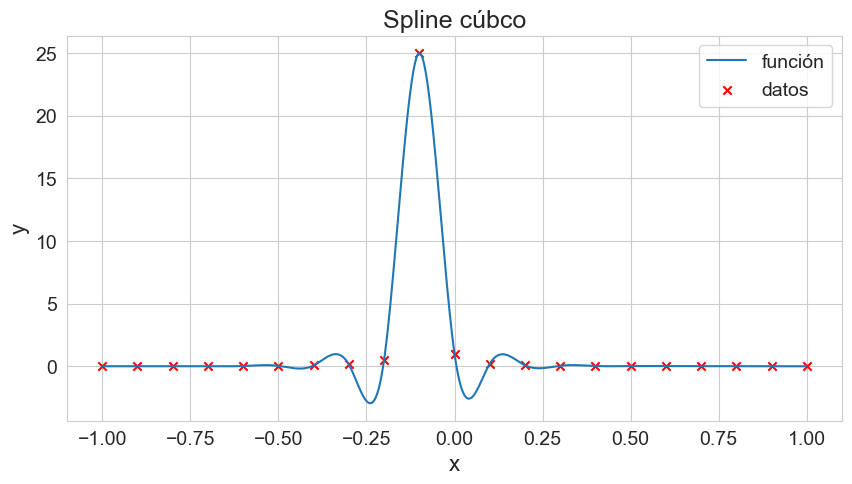

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(-1, 1, 10000)

plt.plot(x0, p(x0), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Spline cúbco', fontsize=18)
plt.legend(fontsize=14)
plt.show()

Supongamos que trabajas en una empresa que fabrica piezas de maquinaria, y tienes un conjunto de datos que representan la resistencia a la tensión de una de las piezas que se fabrican. En particular, tienes datos que muestran la resistencia a la tensión de la pieza en función de la temperatura a la que se sometió durante el proceso de fabricación.


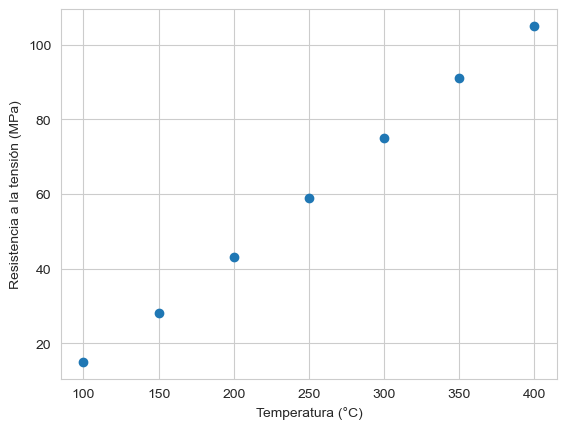

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la resistencia a la tensión
temperaturas = np.array([100, 150, 200, 250, 300, 350, 400])
resistencias = np.array([15, 28, 43, 59, 75, 91, 105])

# Graficar los datos originales
plt.plot(temperaturas, resistencias, 'o')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Resistencia a la tensión (MPa)')
plt.show()

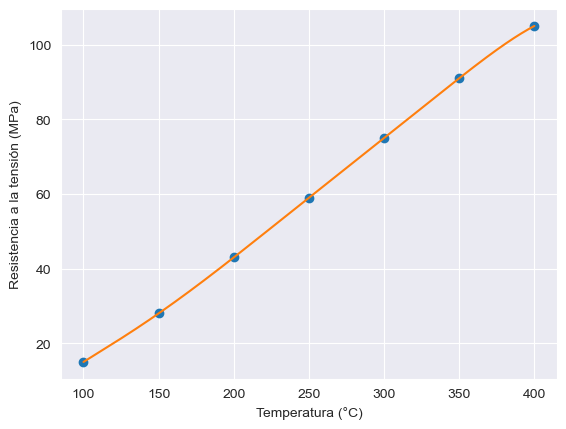

In [37]:
T, P = NewtonPol(list(zip(temperaturas, resistencias)))
# Datos de la resistencia a la tensión
temperaturas = np.array([100, 150, 200, 250, 300, 350, 400])
resistencias = np.array([15, 28, 43, 59, 75, 91, 105])
x_lin = np.linspace(100,400,1000)
# Graficar los datos originales
plt.plot(temperaturas, resistencias, 'o')
plt.plot(x_lin, P(x_lin), '-')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Resistencia a la tensión (MPa)')
plt.show()

El objetivo es encontrar una curva suave que se ajuste a estos datos para poder predecir la resistencia a la tensión de la pieza para temperaturas que no están en los datos originales. Para hacer esto, podemos utilizar la interpolación de splines cúbicos.


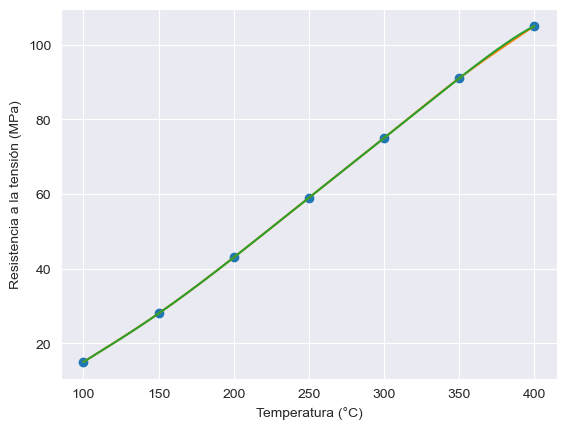

In [39]:
p = CubicSpline(temperaturas, resistencias, bc_type='natural')
temperaturas = np.array([100, 150, 200, 250, 300, 350, 400])
resistencias = np.array([15, 28, 43, 59, 75, 91, 105])
x_lin = np.linspace(100,400,1000)
# Graficar los datos originales
plt.plot(temperaturas, resistencias, 'o')
plt.plot(x_lin, p(x_lin), '-')
plt.plot(x_lin, P(x_lin), '-')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Resistencia a la tensión (MPa)')
plt.show()

In [40]:
print(p(120), P(120))

20.044923076923077 19.926178831018667


C:\Users\caramirezs\AppData\Local\Temp\ipykernel_23820\276190216.py:82: RuntimeWarning: overflow encountered in long_scalars
  out *= (x - p[0])


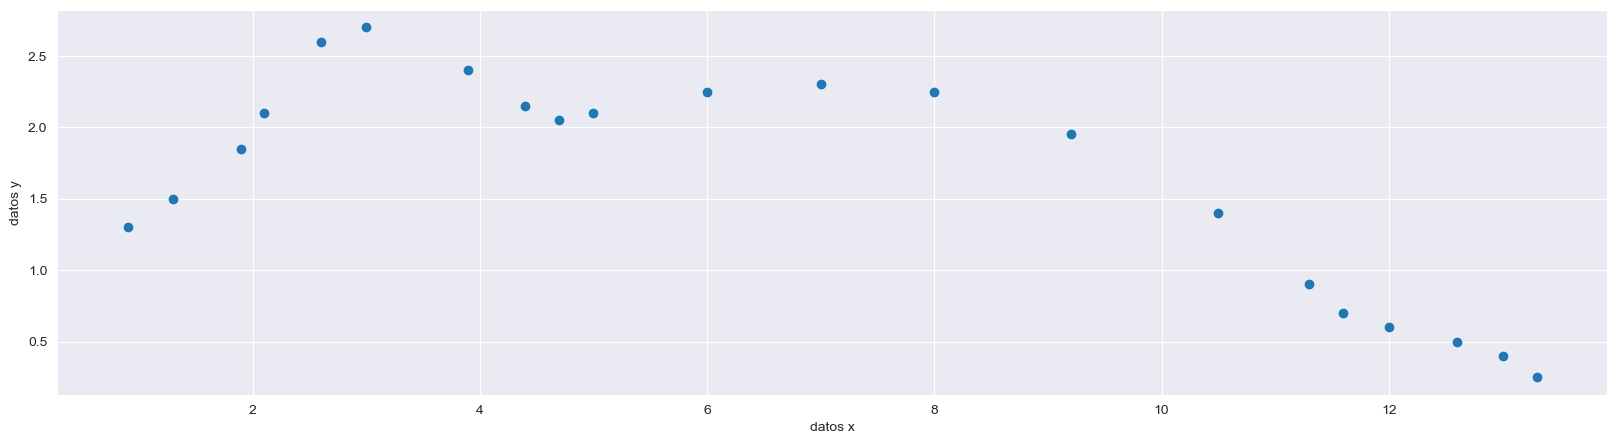

In [41]:
datos_x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5, 6, 7, 8, 9.2, 10.5, 11.3, 11.6, 12, 12.6, 13, 13.3]
datos_y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]
# Graficar los datos originales
plt.figure(figsize=(20,5))
plt.plot(datos_x, datos_y, 'o')
plt.xlabel('datos x')
plt.ylabel('datos y')
plt.show()

In [42]:
spline = CubicSpline(datos_x, datos_y, bc_type='natural')

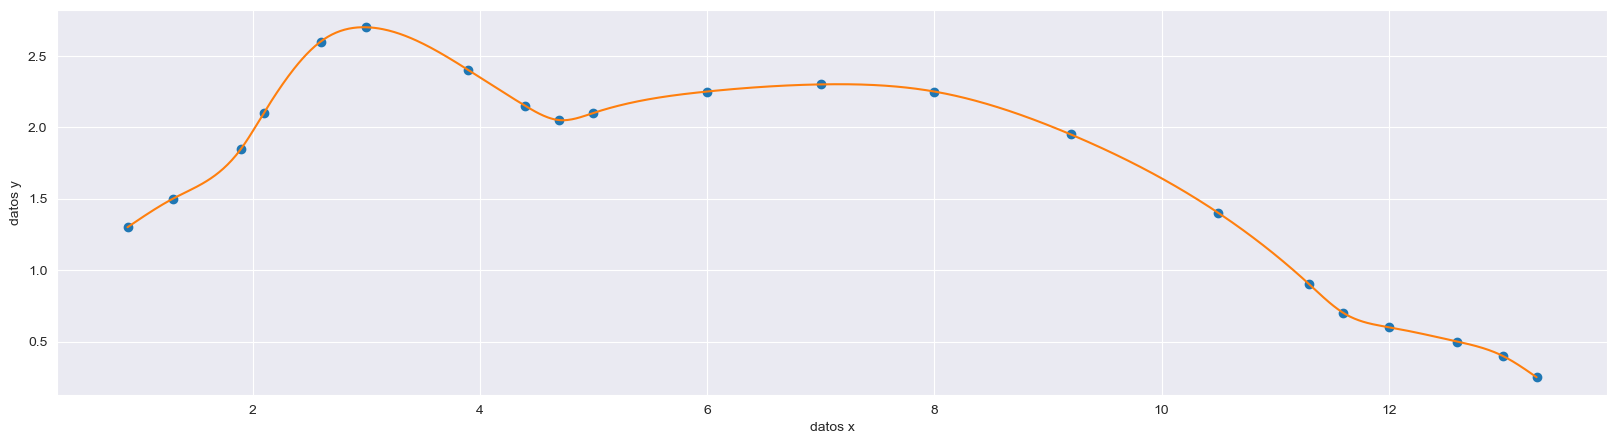

In [43]:
x_lin = np.linspace(0.9,13.3,1000)
plt.figure(figsize=(20,5))
plt.plot(datos_x, datos_y, 'o')
plt.plot(x_lin, spline(x_lin), '-')
plt.xlabel('datos x')
plt.ylabel('datos y')
plt.show()

In [45]:
a,b,c,d = CubicSplines(list(zip(datos_x, datos_y)))

In [62]:
f = lambda x: np.log(x)
x = [1, 1.5, 2, 2.5, 3]
y = [f(1), f(1.5), f(2), f(2.5), f(3)]
a,b,c,d = CubicSplines(list(zip(x,y)))

In [63]:
a, b, c, d

([0.0, 0.4054651081081644, 0.6931471805599453, 0.9162907318741551],
 [0.8662664106740332,
  0.70025782730092,
  0.49158536348195864,
  0.3983544613671898],
 [0.0, -0.3320171667462264, -0.0853277608916963, -0.10113404333784136],
 [-0.2213447778308176,
  0.16445960390302006,
  -0.010537521630763371,
  0.06742269555856091])

In [64]:
spline = CubicSpline(x, y, bc_type='natural')

In [65]:
spline(np.e)

array(0.99912677)

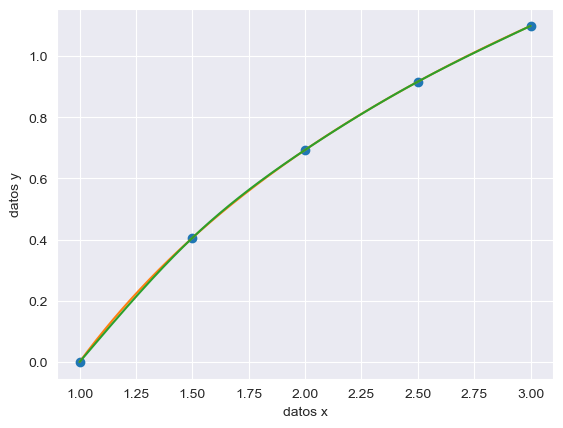

In [66]:
xlin = np.linspace(1,3, 1000)
plt.plot(x, y, 'o')
plt.plot(xlin,f(xlin))
plt.plot(xlin,spline(xlin))
plt.xlabel('datos x')
plt.ylabel('datos y')
plt.show()